In [1]:
from surprise import SVD, SVDpp, NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import matplotlib.pyplot as plt
from surprise import KNNBasic

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin(name='ml-100k', prompt=False)

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9446  0.9356  0.9332  0.9275  0.9448  0.9372  0.0067  
MAE (testset)     0.7425  0.7419  0.7361  0.7294  0.7463  0.7392  0.0059  
Fit time          0.36    0.37    0.36    0.37    0.37    0.37    0.00    
Test time         0.03    0.06    0.03    0.06    0.03    0.04    0.01    


{'test_rmse': array([0.94460474, 0.93559839, 0.93322933, 0.92753492, 0.94481045]),
 'test_mae': array([0.74249781, 0.74186516, 0.73609296, 0.7293559 , 0.74631846]),
 'fit_time': (0.3581078052520752,
  0.3689289093017578,
  0.36186885833740234,
  0.36719536781311035,
  0.36966705322265625),
 'test_time': (0.03455829620361328,
  0.061315059661865234,
  0.03437614440917969,
  0.05919313430786133,
  0.03422093391418457)}

In [2]:
# Розділіть дані на навчальний і тестовий набори за допомогою train_test_split:
trainset, testset = train_test_split(data, test_size=0.25)

In [20]:
# Підберіть найкращі параметри для алгоритмів SVD, SVDpp, NMF та інших алгоритмів за допомогою крос-валідації.
# Для цього використовуйте функцію cross_validate та зберігайте RMSE значення для кожного алгоритму:

user_based_cf = KNNBasic(sim_options={'user_based': True})
item_based_cf = KNNBasic(sim_options={'user_based': False})

algorithms = [SVD(), SVDpp(), NMF(), user_based_cf, item_based_cf]
results = {}

for algo in algorithms:
    algo_key = str(algo.__class__.__name__) + " user_based: " + str(algo.sim_options['user_based'])
    results[algo_key] = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

print(results)


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9395  0.9305  0.9346  0.9426  0.9316  0.9358  0.0046  
Fit time          0.39    0.39    0.43    0.38    0.36    0.39    0.02    
Test time         0.04    0.04    0.08    0.03    0.07    0.05    0.02    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9256  0.9154  0.9272  0.9142  0.9234  0.9212  0.0054  
Fit time          6.17    6.17    6.19    6.20    6.18    6.18    0.01    
Test time         1.13    1.13    1.15    1.16    1.19    1.15    0.02    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9663  0.9708  0.9609  0.9570  0.9505  0.9611  0.0071  
Fit time          0.47    0.47    0.46    0.46    0.46    0.46    0.01    
Test time         0.03    

In [21]:
# Відображіть результати крос-валідації та визначіть алгоритм з найменшим значенням RMSE.
# Використовуйте оптимальний алгоритм для навчання на всьому наборі даних та зробіть передбачення для тестового набору:

best_algo = SVDpp()  # Замініть це на алгоритм з найкращим RMSE
best_algo.fit(trainset)
predictions = best_algo.test(testset)

RMSE: 0.9143
RMSE on test data: 0.9142772950251711


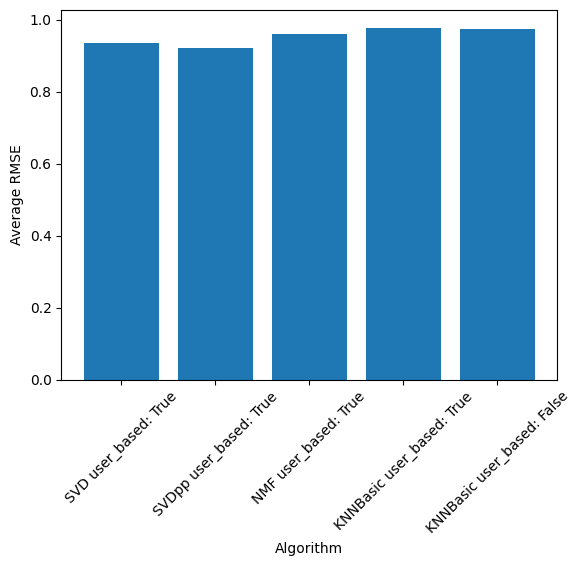

In [22]:
# Розрахуйте RMSE для тестового набору та візуалізуйте результати. Наприклад:

rmse = accuracy.rmse(predictions)
print("RMSE on test data:", rmse)

# Візуалізація результатів крос-валідації
plt.bar(results.keys(), [result['test_rmse'].mean() for result in results.values()])
plt.xlabel('Algorithm')
plt.ylabel('Average RMSE')
plt.xticks(rotation=45)
plt.show()

Висновки:

1. Крос-валідація є важливою частиною розробки рекомендаційних систем, оскільки вона дозволяє об'єктивно оцінювати ефективність різних алгоритмів на вашому наборі даних.

2. За результатами крос-валідації можна визначити алгоритм з найменшим значенням RMSE, яке є показником середньої помилки в передбаченнях. У вашому випадку найефективнішим алгоритмом став `SVDpp()` з найменшим значенням RMSE.

3. Алгоритми колаборативної фільтрації, такі як `user_based_cf` та `item_based_cf`, можуть бути ефективними для побудови рекомендаційних систем, особливо якщо у вас є достатньої кількості інформації про користувачів і предмети.

4. Важливо враховувати, що ефективність алгоритмів може відрізнятися в залежності від конкретного набору даних та завдання рекомендації. Тому важливо випробувати декілька різних алгоритмів та вибрати найкращий після аналізу результатів крос-валідації.